In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64


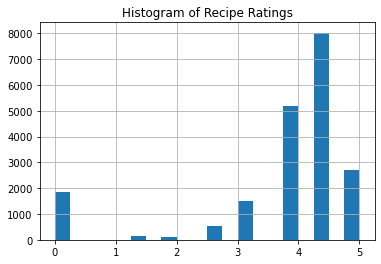

In [5]:
print(raw_data.rating.describe())
raw_data.rating.hist(bins=20)
plt.title("Histogram of Recipe Ratings")
plt.show()

In [6]:
# Count the nulls.
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
rating_df = raw_data.copy()

# We will first drop the `title` column, as it won't be useful for us.
rating_df = rating_df.drop(['title'], 1)

/var/folders/rv/c76y4f5s0k74szpms8nf5ygc0000gn/T/ipykernel_13065/3998152353.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rating_df = rating_df.drop(['title'], 1)


In [8]:
# Make the 'rating' column a binary column.
rating_df.loc[rating_df['rating'] < 4.0, 'rating'] = 0
rating_df.loc[rating_df['rating'] >= 4.0, 'rating'] = 1

rating_df.head(20)

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0.0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Get the correlation based on the binary "rating" column.
corr = rating_df.corr().loc[:, "rating"].sort_values(ascending=False)

corr.head(31)

rating               1.000000
bon appétit          0.097076
roast                0.068198
thanksgiving         0.067094
peanut free          0.065897
soy free             0.065799
dinner               0.062186
christmas            0.054409
grill/barbecue       0.051204
tree nut free        0.047943
backyard bbq         0.047682
fall                 0.046565
grill                0.042924
stuffing/dressing    0.042454
goat cheese          0.041207
father's day         0.036564
dessert              0.036225
meat                 0.035801
fourth of july       0.033651
low carb             0.033458
turkey               0.033409
pork tenderloin      0.033370
cranberry            0.033333
sausage              0.031639
cake                 0.031405
brisket              0.031385
bake                 0.031329
red wine             0.031070
lamb                 0.030731
high fiber           0.030375
pescatarian          0.029739
Name: rating, dtype: float64

Based on the correlation shown, the model will not be great, because the highest correlation is just 9.7%. We will, however, use the first 30 features.

In [10]:
rating_final = rating_df[['bon appétit', 'roast', 'thanksgiving', 'peanut free', 'soy free', 'dinner', 'christmas',
                          'grill/barbecue', 'tree nut free', 'backyard bbq', 'fall', 'grill', 'stuffing/dressing',
                          'goat cheese',  'father\'s day', 'dessert', 'meat', 'fourth of july', 'low carb', 
                          'turkey', 'pork tenderloin', 'cranberry', 'sausage', 'cake', 'brisket', 'bake', 
                          'red wine', 'lamb', 'high fiber', 'pescatarian', 'rating']]

rating_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bon appétit        20052 non-null  float64
 1   roast              20052 non-null  float64
 2   thanksgiving       20052 non-null  float64
 3   peanut free        20052 non-null  float64
 4   soy free           20052 non-null  float64
 5   dinner             20052 non-null  float64
 6   christmas          20052 non-null  float64
 7   grill/barbecue     20052 non-null  float64
 8   tree nut free      20052 non-null  float64
 9   backyard bbq       20052 non-null  float64
 10  fall               20052 non-null  float64
 11  grill              20052 non-null  float64
 12  stuffing/dressing  20052 non-null  float64
 13  goat cheese        20052 non-null  float64
 14  father's day       20052 non-null  float64
 15  dessert            20052 non-null  float64
 16  meat               200

In [11]:
svr = SVR()
X = rating_final.drop(['rating'], 1).sample(frac=.3, replace=True)
Y = rating_final.rating.sample(frac=.3, replace=True)
svr.fit(X, Y)

/var/folders/rv/c76y4f5s0k74szpms8nf5ygc0000gn/T/ipykernel_13065/1239088386.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = rating_final.drop(['rating'], 1).sample(frac=.3, replace=True)


SVR()

In [12]:
svr.score(X, Y)

-0.17737153481775803

In [13]:
cross_val_score(svr, X, Y, cv=5)

array([-0.42940631, -0.49477527, -0.44449816, -0.38523132, -0.43473825])